In [1]:
import numpy as np
import matplotlib.pyplot as plt

Abordaremos el problema del Phantom Dark Matter para el perfil de Hernquist. 
Partiendo de la ecuación de Poisson, calcularemos la densidad de phantom dark matter para luego graficarla respecto al radio. Veremos qué sucede.

Primero construiremos las funciones de las derivadas primera y segunda del potencial gravitacional newtoniano para el perfil de Hernquist.

In [2]:
## Definimos las constantes

G = 430007.1

a_0 = 4679.4 ## [kpc/Gyr^2]  

In [3]:
## Definimos las funciones de las derivadas primera y segunda del potencial en el perfil de Hernquist


def PrimeraPotencial(M, b, r):
    PrimeraPotencial = (G*M) / ((r+b)*(r+b))
    return PrimeraPotencial

def SegundaPotencial(M, b, r):
    SegundaPotencial = -(2.0 / (r+b)) * PrimeraPotencial(M, b, r)
    return SegundaPotencial

In [4]:
## Definimos la densidad de phantom dark matter para las funciones de interpolación de mu,

## R.A.R.

def mu_RAR(M, b, r):
    a = PrimeraPotencial(M, b, r)
    mu_RAR = 1.0 / (1.0 - np.exp( -np.sqrt(a / a_0) ) )
    return mu_RAR

def PDM_RAR(M, b, r):
    a = PrimeraPotencial(M, b, r)
    PDM_RAR = (mu_RAR(M, b, r)/(r+b)) * np.exp(-np.sqrt(a/a_0)) * np.sqrt(a*a*a/a_0)
    return PDM_RAR


## Simple

def mu_Simple(M, b, r):
    a = PrimeraPotencial(M, b, r)
    mu_Simple = 0.5 * (1 + np.sqrt(1.0 + 4.0*a_0/a))
    return mu_Simple

def PDM_Simple(M, b, r):
    a = PrimeraPotencial(M, b, r)
    PDM_Simple = 2.0*a_0 / ((r+b) * np.sqrt(1.0 + 4.0*a_0/a))
    return PDM_Simple



## Standard

def mu_Standar(M, b, r):
    a = PrimeraPotencial(M, b, r)
    mu_Standar = np.sqrt(0.5 * (1.0 + np.sqrt(1.0 + 4.0*a_0/a)))
    return mu_Standar

def PDM_Standard(M, b, r):
    a = PrimeraPotencial(M, b, r)
    PDM_Standard = 2.0 * a_0 / (mu_Standar(M, b, r) * a * np.sqrt(1.0 + 4.0*a_0*a_0/a))
    return PDM_Standard


In [5]:
## Definimos el vector de posición r y le damos un valor arbitrario a los parámetros

r = np.arange(0.0, 20.0, 0.05)

M = 1.0

b = 2.0

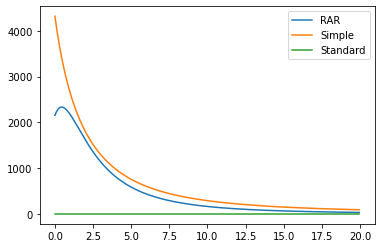

In [6]:
## Graficamos las respectivas densidades de PDM

plt.plot(r, PDM_RAR(M, b, r), label='RAR')
plt.plot(r, PDM_Simple(M, b, r), label='Simple')
plt.plot(r, PDM_Standard(M, b, r), label='Standard')
plt.legend()

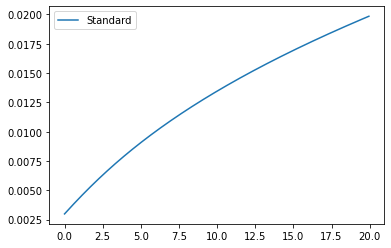

In [7]:
## Graficando sólo Standard tenemos lo siguiente

plt.plot(r, PDM_Standard(M, b, r), label='Standard')
plt.legend()

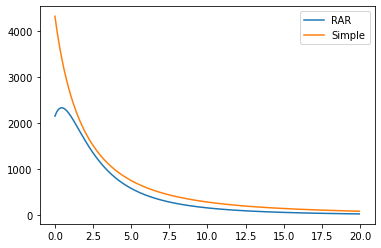

In [8]:
## Graficando sólo RAR y Simple

plt.plot(r, PDM_RAR(M, b, r), label='RAR')
plt.plot(r, PDM_Simple(M, b, r), label='Simple')
plt.legend()